In [1]:
import torch
from _utils_examples import cnn, fmnist_data, get_logpath
from backpack import extend
from cockpit import Cockpit, CockpitPlotter
from cockpit.utils.configuration import configuration as config

In [2]:
fmnist_data = fmnist_data()
model = extend(cnn())
loss_fn = extend(torch.nn.CrossEntropyLoss(reduction="mean"))
losses_fn = torch.nn.CrossEntropyLoss(reduction="none")
opt = torch.optim.SGD(model.parameters(), lr=1e-2)

cockpit = Cockpit(model.parameters(), quantities=config("full"))
plotter = CockpitPlotter()

max_steps, global_step = 5, 0

/opt/anaconda3/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


step iter: 0
step iter: 1
step iter: 2


/opt/anaconda3/lib/python3.7/site-packages/cockpit/quantities/hess_max_ev.py:171: UserWarning: Exceeded maximum number of 100 iterations
  warnings.warn(f"Exceeded maximum number of {maxiter} iterations")


step iter: 3
step iter: 4
[cockpit] writing output to /Users/karimimohammedbelhal/Desktop/blitz-bayesian-deep-learning-master/blitz/logfiles/cockpit_output.json


AttributeError: module 'seaborn' has no attribute 'histplot'

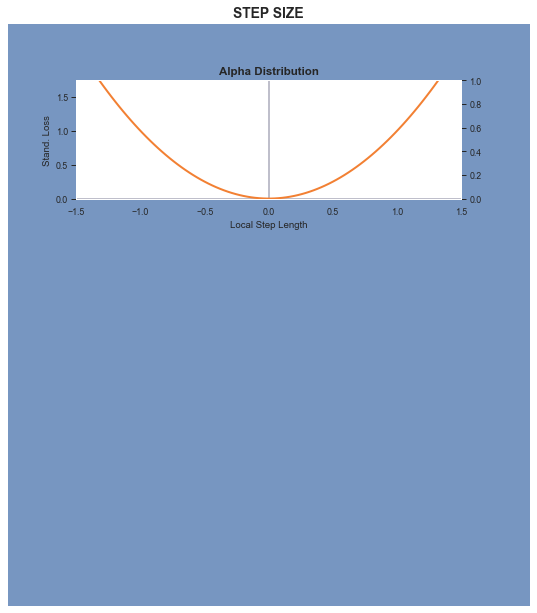

In [3]:
max_steps, global_step = 5, 0
for inputs, labels in iter(fmnist_data):
	print("step iter:",global_step)
	opt.zero_grad()
	outputs = model(inputs)
	loss = loss_fn(outputs, labels)
	losses = losses_fn(outputs, labels)

	with cockpit(
		global_step,
		info={
		"batch_size": inputs.shape[0],
		"individual_losses": losses,
		"loss": loss,
		"optimizer": opt,
		},
	):
		loss.backward(
			create_graph=cockpit.create_graph(global_step),
		)

	opt.step()
	global_step += 1

	if global_step >= max_steps:
		break

cockpit.write(get_logpath())
plotter.plot(get_logpath())